In [1]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import data from wikipedia
tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

In [3]:
# get list of all tickers 
tickers = tickers.Symbol.to_list()

In [4]:
# replace . with -
tickers = [i.replace(".", "-") for i in tickers]

In [5]:
# define start and end dates (change later to textboxes)
start = "2011-01-01"
end = "2022-01-01"

In [6]:
# Moving Average Crossover
# get moving average values
ma1 = 20
ma2 = 50


def movingAverageCalc(asset):
    df = yf.download(asset, start = start, end = end)
    df["MA" + str(ma1)] = df['Adj Close'].rolling(window=ma1).mean()
    df["MA" + str(ma2)] = df['Adj Close'].rolling(window=ma2).mean()

    # df.loc[(df["MA" + str(ma1)] > df["MA" + str(ma2)]), 'Buy'] = "Yes"
    # df.loc[(df["MA" + str(ma1)] > df["MA" + str(ma2)]), 'Buy'] = "No"

    df['Signal'] = np.where(df["MA" + str(ma1)] > df["MA" + str(ma2)], 1, 0)
    df['Position'] = df['Signal'].diff()

    df.loc[(df['Position'] == 1), 'Buy'] = "Yes"
    df.loc[(df['Position'] == -1), 'Buy'] = "Sell"

    
    return df
    

In [7]:
movingAverageCalc(tickers[0])


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,Signal,Position,Buy
Date,,,,,,,,,,,
2011-01-03,86.750000,87.330002,86.739998,86.790001,60.800995,2632800,NaN,NaN,0,NaN,NaN
2011-01-04,87.000000,87.279999,86.279999,86.669998,60.716923,2644100,NaN,NaN,0,0.0,NaN
2011-01-05,86.290001,87.900002,86.120003,86.669998,60.716923,4081300,NaN,NaN,0,0.0,NaN
2011-01-06,86.860001,87.190002,85.629997,86.139999,60.345634,3452600,NaN,NaN,0,0.0,NaN
2011-01-07,86.550003,87.309998,85.949997,86.230003,60.408688,3355500,NaN,NaN,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,175.149994,176.729996,174.910004,176.699997,167.297440,1183000,165.247173,168.221700,0,0.0,NaN
2021-12-28,176.839996,178.500000,176.750000,177.639999,168.187424,1618900,165.313921,168.168087,0,0.0,NaN
2021-12-29,177.479996,178.889999,177.229996,178.410004,168.916473,1221900,165.710152,168.133187,0,0.0,NaN


In [8]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []

    for i in range(len(df)):
        if df["Buy"].iloc[i] == "Yes": 
            Buying_dates.append(df.iloc[i+1].name)
        elif df["Buy"].iloc[i] == "Sell":
            Selling_dates.append(df.iloc[i+1].name)
    return Buying_dates, Selling_dates

In [9]:
frame = movingAverageCalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


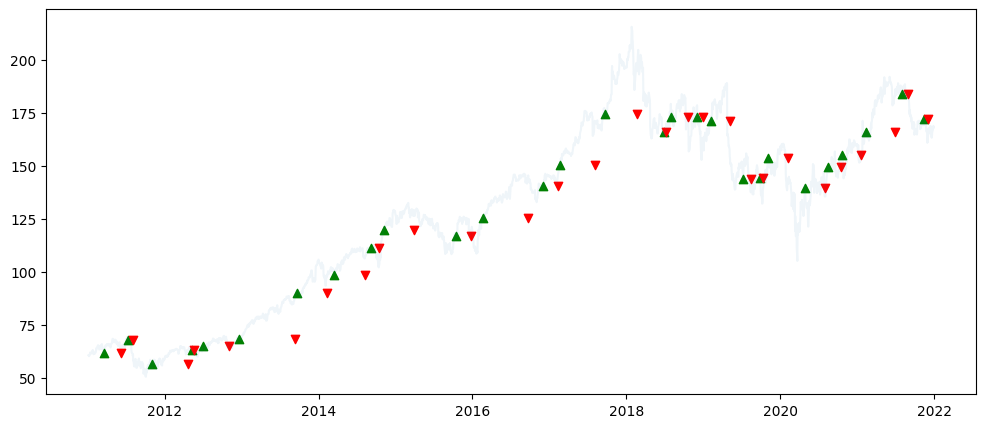

In [12]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker = '^', c='g')
plt.scatter(frame.loc[sell].index, frame.loc[buy]['Adj Close'], marker = 'v', c='r')
plt.plot(frame['Adj Close'], alpha=.07)

In [13]:
# calculate profits of first ticker
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
Profits

array([ 0.02110942, -0.14076818,  0.10563025, -0.02708286, -0.01511926,
        0.28585349,  0.06641981,  0.07664515, -0.07028605,  0.06243176,
       -0.00053416,  0.15017585,  0.03880217,  0.126484  ,  0.09755862,
        0.02305695, -0.03361345, -0.08516775, -0.09441852, -0.04891994,
       -0.06292553, -0.07765712, -0.04699128,  0.03237957, -0.00353694,
        0.07631399, -0.02604791, -0.07708188])

In [14]:
# winning rate 
wins = [i for i in Profits if i >0]
len(wins)/ len(Profits)

0.4642857142857143